In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [8]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_C_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,NaN,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [9]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	55
float64		column 2	54
float64		column 3	51
float64		column 4	53
float64		column 5	42
float64		column 6	31
float64		column 7	52
float64		column 8	53
float64		column 9	35
float64		column 10	47
float64		column 11	46
float64		column 12	37
float64		column 13	49
float64		column 14	53
float64		column 15	45
float64		column 16	30
float64		column 17	40
float64		column 18	38
float64		column 19	54
float64		column 20	42
float64		column 21	54
float64		column 22	44
float64		column 23	33
float64		column 24	36
float64		column 25	52
float64		column 26	49
float64		column 27	40
float64		column 28	46
float64		column 29	55
float64		column 30	50
float64		column 31	54
float64		column 32	54
float64		column 33	45
float64		column 34	46
float64		column 35	37
float64		column 36	63
float64		column 37	49
float64		column 38	46
float64		column 39	53
float64		column 40	35
float64		column 41	56
float64		column 42	49
float64		column 43	39
float64		column 44	36
flo

In [10]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4542.000000,4543.000000,4546.000000,4544.000000,4555.000000,4566.000000,4545.000000,4544.000000,4562.000000,4550.000000,...,4560.000000,4549.000000,4564.000000,4554.000000,4549.000000,4556.000000,4548.000000,4544.000000,4535.000000,4559.000000
mean,0.104692,0.215267,0.281549,0.066246,0.313405,0.096233,0.114068,0.105638,0.090160,0.240404,...,0.031899,0.038838,0.139369,0.016909,0.270244,0.076077,0.044004,5.200005,51.932084,283.511954
std,0.306579,1.298562,0.505451,1.403857,0.674707,0.274661,0.391812,0.402951,0.278729,0.646745,...,0.286868,0.244821,0.271063,0.109371,0.819571,0.246936,0.430883,31.908206,193.413163,607.231669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.277000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.318000,0.052000,0.000000,3.707000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

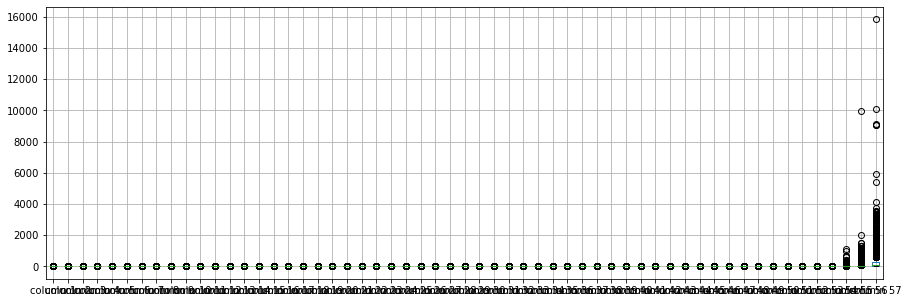

In [11]:
df.boxplot(return_type='axes', figsize=(15,5))

In [12]:
df.mean()

column 1       0.104692
column 2       0.215267
column 3       0.281549
column 4       0.066246
column 5       0.313405
column 6       0.096233
column 7       0.114068
column 8       0.105638
column 9       0.090160
column 10      0.240404
column 11      0.060242
column 12      0.542316
column 13      0.094008
column 14      0.058453
column 15      0.048946
column 16      0.248999
column 17      0.143004
column 18      0.182204
column 19      1.661409
column 20      0.086101
column 21      0.809049
column 22      0.122480
column 23      0.102200
column 24      0.094343
column 25      0.549113
column 26      0.266115
column 27      0.757279
column 28      0.125269
column 29      0.099881
column 30      0.103600
column 31      0.064460
column 32      0.046648
column 33      0.096498
column 34      0.047306
column 35      0.105469
column 36      0.098077
column 37      0.137463
column 38      0.013322
column 39      0.078281
column 40      0.064925
column 41      0.044109
column 42      0

In [13]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016213,0.071192,0.013749,0.019225,0.063406,-0.003839,-0.004522,0.107348,0.041799,...,-0.017905,-0.026962,-0.022048,-0.032766,0.057498,0.117686,-0.008055,0.043284,0.058869,0.087713
column 2,-0.016213,1.000000,-0.033952,-0.007023,-0.023763,-0.025122,0.003638,-0.016671,-0.004896,0.033390,...,-0.015846,-0.007608,-0.050091,-0.018558,-0.014576,-0.009989,0.001957,0.001723,-0.001674,-0.023547
column 3,0.071192,-0.033952,1.000000,-0.020518,0.077504,0.087856,0.039736,0.010370,0.098424,0.032361,...,-0.026409,-0.033493,-0.014273,-0.034167,0.109938,0.087288,-0.002095,0.097969,0.107180,0.068732
column 4,0.013749,-0.007023,-0.020518,1.000000,0.003101,-0.010073,0.019908,0.010635,-0.002526,-0.005078,...,-0.001979,-0.000617,-0.012526,-0.007037,-0.003211,0.010873,-0.000295,0.005211,0.022480,0.021840
column 5,0.019225,-0.023763,0.077504,0.003101,1.000000,0.053413,0.148505,0.028960,0.019663,0.032574,...,-0.033819,-0.032835,-0.045493,-0.025457,0.026216,0.041464,0.002798,0.051898,0.054667,0.002007
column 6,0.063406,-0.025122,0.087856,-0.010073,0.053413,1.000000,0.061846,0.079119,0.119313,0.013499,...,-0.031431,-0.019739,-0.008630,-0.014592,0.062461,0.106905,0.021202,-0.009785,0.094773,0.084314
column 7,-0.003839,0.003638,0.039736,0.019908,0.148505,0.061846,1.000000,0.044169,0.040814,0.057432,...,-0.031246,-0.033032,-0.051555,-0.027829,0.053989,0.067970,0.046057,0.038654,0.061473,-0.007583
column 8,-0.004522,-0.016671,0.010370,0.010635,0.028960,0.079119,0.044169,1.000000,0.106564,0.082722,...,-0.021149,-0.027873,-0.032175,-0.019478,0.029686,0.060006,-0.008396,0.009560,0.037128,0.038212
column 9,0.107348,-0.004896,0.098424,-0.002526,0.019663,0.119313,0.040814,0.106564,1.000000,0.132449,...,-0.029324,-0.015943,-0.029640,0.014510,0.043865,0.149739,0.000098,0.109765,0.191240,0.251538
column 10,0.041799,0.033390,0.032361,-0.005078,0.032574,0.013499,0.057432,0.082722,0.132449,1.000000,...,-0.016017,0.011946,0.003553,0.006608,0.037146,0.074393,0.045142,0.072551,0.104300,0.085466


In [14]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [15]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 684.4737577006376
Epoch: 1 , loss: 673.9821432824749
Epoch: 2 , loss: 672.8806021022465
Epoch: 3 , loss: 673.1823771406964
Epoch: 4 , loss: 680.5190590782032
Epoch: 5 , loss: 678.4289976113349
Epoch: 6 , loss: 671.0472888481327
Epoch: 7 , loss: 672.9629760901687
Epoch: 8 , loss: 677.6735300735314
Epoch: 9 , loss: 672.2231378854359
Epoch: 10 , loss: 670.4050458316603
Epoch: 11 , loss: 663.345944873132
Epoch: 12 , loss: 674.4834160887821
Epoch: 13 , loss: 680.8662721587391
Epoch: 14 , loss: 668.7652643183798
Epoch: 15 , loss: 669.4597851690099
Epoch: 16 , loss: 656.8507958920575
Epoch: 17 , loss: 640.7057858244467
Epoch: 18 , loss: 617.1857538522328
Epoch: 19 , loss: 577.9643889104863
Epoch: 20 , loss: 580.0691173699674
Epoch: 21 , loss: 559.1165965542145
Epoch: 22 , loss: 561.4589579246601
Epoch: 23 , loss: 575.1030645337254
Epoch: 24 , loss: 580.4515266551373
Epoch: 25 , loss: 587.0882835255268
Epoch: 

In [16]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [17]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.039268
column 44  

In [18]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [19]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.347195,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.123994,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [20]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [21]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [22]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

3853.9976430211477

In [23]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [24]:
NRMS=numerator/denominator
NRMS


0.08120747942008485

In [25]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.014734
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [26]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.000000,0.32,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.347195,0.14,0.28,0.21,0.07,0.000000,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.000000,0.63,0.00,0.31,0.63,0.310000,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.000000,1.85,0.00,0.00,1.85,0.000000,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.000000,1.92,0.00,0.00,0.00,0.000000,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.123994,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.000000,0.34,0.34,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [27]:
imputations[-1].to_excel("Spam_C_1(imp).xlsx", index=False, header=False)